In [52]:
from keras.layers import Input, Dense
from keras.models import Model

encoding_dim = 32

input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [3]:
encoder = Model(input_img, encoded)
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [5]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')


In [46]:
import random, os
from keras.layers import Input, Dense, Convolution2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K
from glob import glob
from PIL import Image
import numpy as np

path = '../dataset/'

def load_data():
    train = []
    test = []
    filenames = os.listdir(path)
    index = 0
    for file in filenames:
        pic = Image.open(path + file)    
        pic = np.array(pic)[:, :, 1]
        if random.choice([True, False]) == True:
            train.append(pic)
        else:
            test.append(pic)
    print(np.array(train).shape, np.array(test).shape)
    train = np.array(train)
    test = np.array(test)
    return train, test

In [47]:
x_train, x_test = load_data()


(30, 28, 28) (34, 28, 28)


In [48]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)


(30, 784)
(34, 784)


In [49]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 30 samples, validate on 34 samples
Epoch 1/50
30/30 [==============================] - 0s 128us/step - loss: 0.3158 - val_loss: 0.2751
Epoch 2/50
30/30 [==============================] - 0s 69us/step - loss: 0.3054 - val_loss: 0.2718
Epoch 3/50
30/30 [==============================] - 0s 161us/step - loss: 0.2989 - val_loss: 0.2699
Epoch 4/50
30/30 [==============================] - 0s 97us/step - loss: 0.2943 - val_loss: 0.2686
Epoch 5/50
30/30 [==============================] - 0s 81us/step - loss: 0.2908 - val_loss: 0.2676
Epoch 6/50
30/30 [==============================] - 0s 68us/step - loss: 0.2879 - val_loss: 0.2667
Epoch 7/50
30/30 [==============================] - 0s 66us/step - loss: 0.2855 - val_loss: 0.2659
Epoch 8/50
30/30 [==============================] - 0s 67us/step - loss: 0.2832 - val_loss: 0.2651
Epoch 9/50
30/30 [==============================] - 0s 111us/step - loss: 0.2812 - val_loss: 0.2644
Epoch 10/50
30/30 [==============================] - 0s 106us/

In [50]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

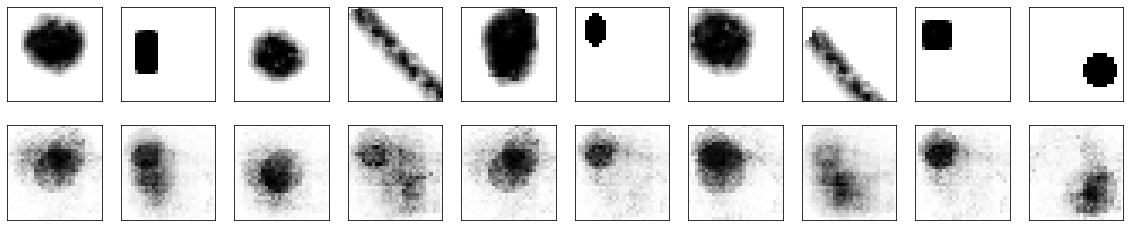

In [51]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()